In [1]:
from tensorflow.keras import applications
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
%matplotlib inline

In [2]:
img_path = r"C:\Users\Batool\Desktop\task\dataset"

In [32]:
data =ImageDataGenerator(rescale=1./255, shear_range=0.5, zoom_range=0.5, 
                            validation_split=0.5, preprocessing_function=preprocess_input,
                            width_shift_range=0.5, 
                            horizontal_flip=True,
                            fill_mode='nearest',
                            height_shift_range=0.5, channel_shift_range=                            
                         
                        
                        )


train = data.flow_from_directory(img_path, subset='training', target_size=(224,224), class_mode='categorical', shuffle=True )
test = data.flow_from_directory(img_path, subset='validation', target_size=(224,224), shuffle=True, class_mode='categorical')

Found 1165 images belonging to 3 classes.
Found 1165 images belonging to 3 classes.


In [4]:
train.class_indices

{'bus': 0, 'car': 1, 'truck': 2}

In [5]:
test.class_indices

{'bus': 0, 'car': 1, 'truck': 2}

In [6]:
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
for layer in model.layers[:17]:
    layer.trainable = False

#Adding custom Layers 

x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(512, activation="relu")(x)

predictions = Dense(3, activation="softmax")(x)

# creating the final model 
model = Model(inputs = model.input, outputs = predictions)

# compile the model 


In [7]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
early_stop=EarlyStopping(monitor='val_loss', min_delta=0.005, patience=10, mode='min')


In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience = 5, verbose=1)

In [10]:
mc = ModelCheckpoint('besodel.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history=model.fit(train, validation_data = test, epochs=30, verbose=1, batch_size=16,  callbacks=[reduce_lr, early_stop, mc])


Epoch 1/25
37/37 [==============================] - ETA: 0s - loss: 1.1182 - accuracy: 0.5099
Epoch 1: val_accuracy improved from -inf to 0.67039, saving model to best_model.h5
37/37 [==============================] - 399s 11s/step - loss: 1.1182 - accuracy: 0.5099 - val_loss: 0.8036 - val_accuracy: 0.6704 - lr: 0.0010
Epoch 2/25
37/37 [==============================] - ETA: 0s - loss: 0.6174 - accuracy: 0.7296
Epoch 2: val_accuracy improved from 0.67039 to 0.72446, saving model to best_model.h5
37/37 [==============================] - 468s 13s/step - loss: 0.6174 - accuracy: 0.7296 - val_loss: 0.6414 - val_accuracy: 0.7245 - lr: 0.0010
Epoch 3/25
37/37 [==============================] - ETA: 0s - loss: 0.5582 - accuracy: 0.7854
Epoch 3: val_accuracy improved from 0.72446 to 0.79313, saving model to best_model.h5
37/37 [==============================] - 451s 12s/step - loss: 0.5582 - accuracy: 0.7854 - val_loss: 0.5141 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 4/25
37/37 [=============

In [21]:
classes= train.class_indices


from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import numpy as np

37/37 [==============================] - 227s 6s/step


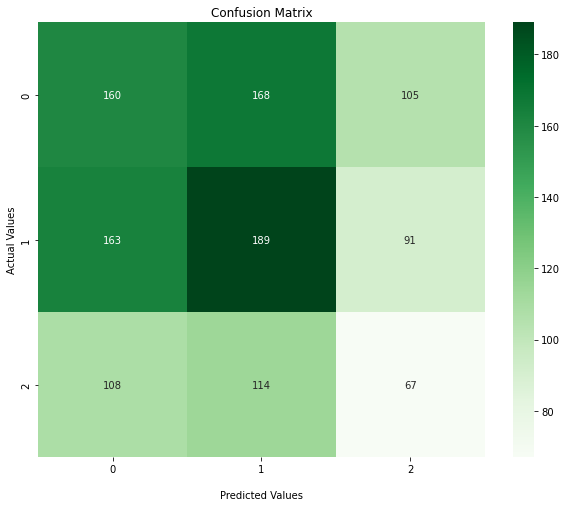

In [22]:
import numpy as np
import seaborn as sns

predictions= model.predict(test)
predictions= np.argmax (predictions,axis=1)
predictions
cm=confusion_matrix(test.classes,predictions)
plt.figure(figsize=[10,8])
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt="d", cmap='Greens')          
ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

In [23]:
import pandas as pd
from sklearn.metrics import classification_report

print(classification_report(test.classes, predictions))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37       433
           1       0.40      0.43      0.41       443
           2       0.25      0.23      0.24       289

    accuracy                           0.36      1165
   macro avg       0.34      0.34      0.34      1165
weighted avg       0.35      0.36      0.36      1165



In [24]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+ metric])
    plt.show()

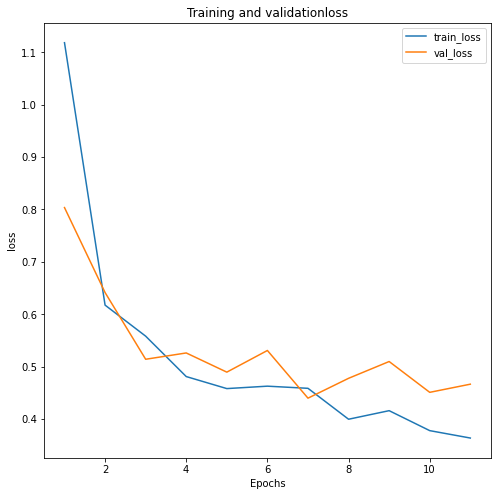

In [25]:
plt.figure (figsize=[8,8])
plot_metric(history, 'loss')

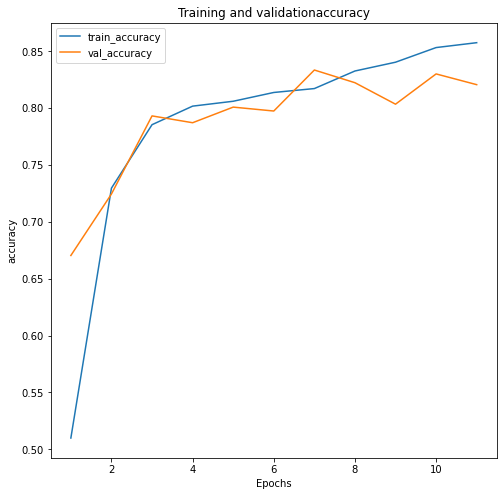

In [26]:
plt. figure (figsize=[8,8])
plot_metric(history, 'accuracy')



In [27]:
import cv2
import numpy
from tensorflow import keras

cap = cv2.VideoCapture("C:/Users/Batool/Desktop/task/demo.mkv")

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
size = (224, 224)

result = cv2.VideoWriter('out.avi', cv2.VideoWriter_fourcc(*'MJPG'),
                         fps=20, frameSize=size)

frames = []
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    frame = cv2.resize(frame, (224, 224))
    frames.append(frame)
  else:
    break
frames_arr = numpy.array(frames)

In [30]:
model = keras.models.load_model(r"C:\Users\Batool\Desktop\task\Untitled Folder\best_model.h5")
predictions = model.predict(frames_arr)
out = predictions.argmax(axis=1)

112/112 [==============================] - 555s 5s/step


In [31]:
for i, f in enumerate(frames):
  label = {0:'bus', 1:'car', 2:'truck'}
  index = out[i]
  image = cv2.putText(f,label[index], (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1, 255)
  cv2.imwrite("test.jpg", image)
  result.write(image)
result.release()

In [ ]:
!cp -r '/content/out.avi' -d '/content/drive/'